## Explore the NOTEEVENTS table of MIMIC-III database.

In [162]:
import os, sys
import time
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [163]:
# gz_path = os.path.join(os.getcwd(), '../alpha.physionet.org/files/mimiciii/1.4', 'NOTEEVENTS.csv.gz')
path = os.path.join(os.getcwd(), 'data/NOTEEVENTS.csv')

## Read CSV file:

In [164]:
start = time.time()
df_notes = pd.read_csv(path, encoding='utf8', engine='python')
end = time.time()
print('Read NOTEEVENTS.csv in {} seconds'.format(end-start))

Read NOTEEVENTS.csv in 1321.6880781650543 seconds


## General info

In [13]:
df_notes.describe()

,ROW_ID,SUBJECT_ID,HADM_ID,CGID,ISERROR
count,2.083180e+06,2.083180e+06,1.851344e+06,1.246404e+06,886.0
mean,1.041590e+06,3.242564e+04,1.498796e+05,1.771630e+04,1.0
std,6.013624e+05,2.755425e+04,2.878059e+04,2.158703e+03,0.0
min,1.000000e+00,2.000000e+00,1.000010e+05,1.401000e+04,1.0
25%,5.207958e+05,1.146500e+04,1.251950e+05,1.580300e+04,1.0
50%,1.041590e+06,2.344400e+04,1.496010e+05,1.759300e+04,1.0
75%,1.562385e+06,5.077200e+04,1.748120e+05,1.959900e+04,1.0
max,2.083180e+06,9.999900e+04,1.999990e+05,2.157000e+04,1.0


In [14]:
df_notes.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


## Category distribution

In [25]:
categories  = df_notes['CATEGORY']
category_name = np.unique(categories)
category_count = np.zeros(len(category_name))
for i in range(len(category_name)):
    category_count[i] = len(df_notes[df_notes['CATEGORY'] == category_name[i]])

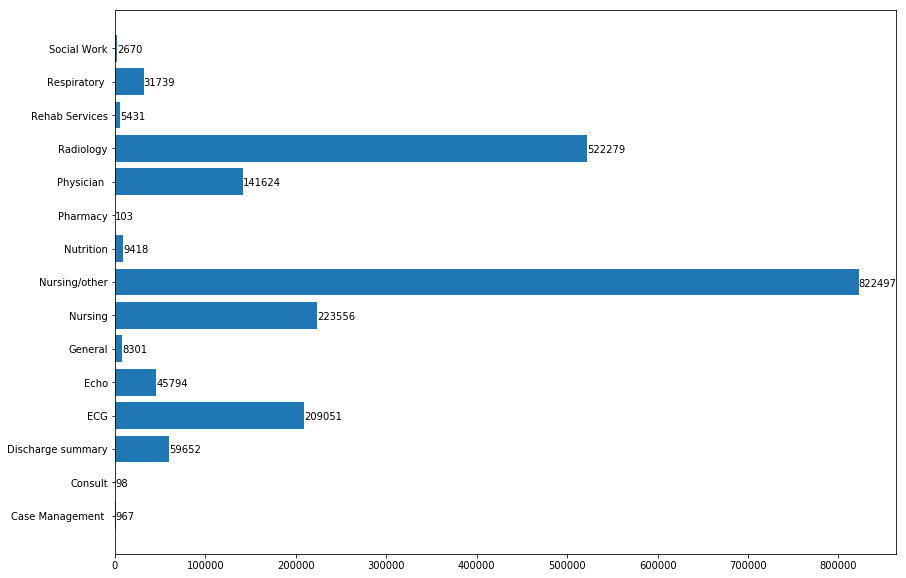

In [40]:
fig, ax = plt.subplots(figsize=(14,10))
ax.barh(category_name, category_count)
for i, v in enumerate(category_count):
    ax.text(v+3, i-0.12, str(int(v)))
plt.show()

## Text-length distribution

### All categories:

In [99]:
def cat_text_len(df, cat):
    if cat == 'All':
        filt = df
    else:
        filt = df[df['CATEGORY'] == cat]
    l = len(filt)
    lengths = np.zeros(l)
    text_list = list(filt['TEXT'])
    for i in range(l):
        lengths[i] = len(text_list[i])
    return lengths

In [100]:
category_name_all = ['All'] + list(category_name)

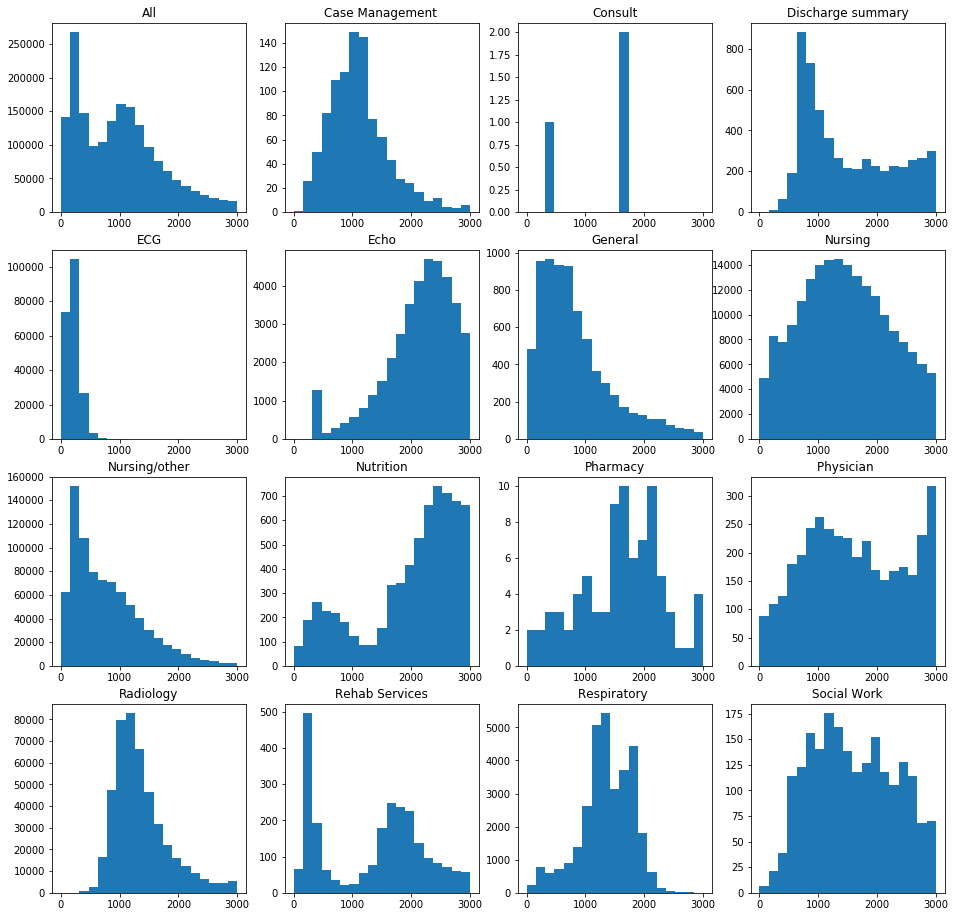

In [101]:
fig, axs = plt.subplots(4, 4, figsize = (16, 16), sharex=False, sharey=False)
for i in range(len(category_name_all)):
    lengths = cat_text_len(df_notes, category_name_all[i])   
    axs[int(i/4), int(i%4)].hist(lengths, np.linspace(0, 3000, 20))
    axs[int(i/4), int(i%4)].title.set_text(category_name_all[i])
plt.show()

## Unique patient and admission:

In [108]:
unique_pat, unique_adm = np.unique(df_notes['SUBJECT_ID']), np.unique(df_notes['HADM_ID'])
note_per_pat, note_per_adm = len(df_notes)/len(unique_pat), len(df_notes)/len(unique_adm)
print('In average, across all note types, the table has {} notes per patient and {} note per hospital admission.'
      .format(np.round(note_per_pat, 2), np.round(note_per_adm, 2)))

In average, across all note types, the table has 45.14 notes per patient and 7.18 note per hospital admission.


## Note example by category

In [125]:
df_eg = pd.DataFrame(columns = ['CATEGORY', 'TEXT_EG'])
for i, cat in enumerate(category_name):
    text = list(df_notes[df_notes['CATEGORY'] == cat]['TEXT'])[0]
    df_eg.loc[i] = [cat, text]

In [161]:
# pd.options.display.max_colwidth = 10**10
# df_eg

## Categories that contain ISERROR info and error rate

In [165]:
err = df_notes[df_notes['ISERROR'] == 1]
err_category = list(np.unique(err['CATEGORY']))

In [168]:
# Error rate:
error_rate = np.zeros(len(err_category))
for i in range(len(err_category)):
    filt = df_notes[df_notes['CATEGORY'] == err_category[i]]
    error_rate[i] = len(filt[filt['ISERROR'] == 1])/len(filt)

In [169]:
print('Error rate of each category:')
dict(zip(err_category, np.round(error_rate, 4)))

Error rate of each category:


{'Case Management ': 0.0145,
 'General': 0.0078,
 'Nursing': 0.0017,
 'Nutrition': 0.0019,
 'Pharmacy': 0.0194,
 'Physician ': 0.0024,
 'Rehab Services': 0.0042,
 'Respiratory ': 0.0012,
 'Social Work': 0.0034}